## Problem Statement
- Classify a mail as either spam or legitimate email.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


## Data Exploration & Preprocessing

- Dataset Balancing.


In [5]:
# Checking for null values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [11]:
# Balancing the dataset
ham = ham.sample(spam.shape[0])

In [12]:
df_ = ham.append(spam, ignore_index=True)

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_13723/1249065394.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = ham.append(spam, ignore_index=True)


In [13]:
df_['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

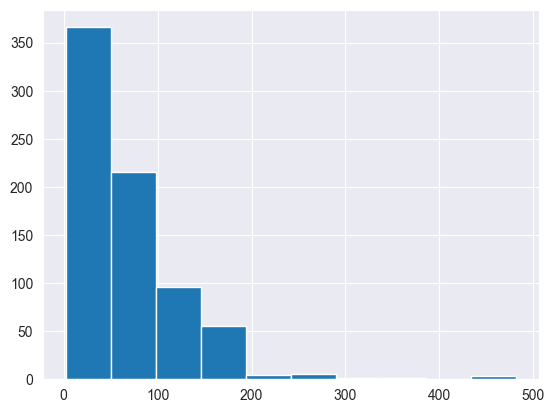

In [14]:
plt.hist(df_[df_['label'] == 'ham']['length'])
plt.show()

(array([  7.,  16.,  23.,  24.,  54., 121., 408.,  89.,   4.,   1.]),
 array([ 13.,  34.,  55.,  76.,  97., 118., 139., 160., 181., 202., 223.]),
 <BarContainer object of 10 artists>)

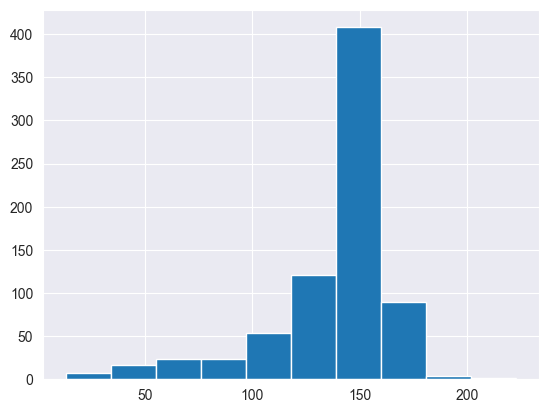

In [15]:
plt.hist(df_[df_['label'] == 'spam']['length'])

## Split Data into Training & Testing Sets

#### Import Libraries

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_['message'], df_['label'], test_size=0.25, random_state=0, shuffle=True)

## Building the Model: Random Forest

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [41]:
RFC = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=10))])

In [42]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

## Predicting the Random Forest Model

In [43]:
yPred = RFC.predict(X_test)

In [44]:
y_test, yPred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 1190    spam
 1057    spam
 186      ham
 156      ham
 1168    spam
 Name: label, Length: 374, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
accuracy_score(y_test, yPred)

0.9411764705882353

In [47]:
confusion_matrix(y_test, yPred)

array([[186,   4],
       [ 18, 166]])

In [48]:
print(classification_report(y_test, yPred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       190
        spam       0.98      0.90      0.94       184

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



## Building Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
vectorMach = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C=100, gamma='auto'))])

In [51]:
vectorMach.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

## Predicting the Results of Support Vector Machine

In [52]:
yPred_ = vectorMach.predict(X_test)

In [53]:
accuracy_score(y_test, yPred_)

0.946524064171123

In [54]:
confusion_matrix(y_test, yPred_)

array([[189,   1],
       [ 19, 165]])

In [55]:
print(classification_report(y_test, yPred_))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       190
        spam       0.99      0.90      0.94       184

    accuracy                           0.95       374
   macro avg       0.95      0.95      0.95       374
weighted avg       0.95      0.95      0.95       374



## Testing Both Data Models

In [63]:
test1 = ['$2,308 Lottery Deposit ON the way.']
test2 = ['Hello, you are learning natural language processing.']
test3 = ['Congratulations, You won a lottery ticket $1 million. Click this link www.lottery.com.']
test4 = ['Silicon Valley Extinction Event.']

In [68]:
print(RFC.predict(test1))
print(RFC.predict(test2))
print(RFC.predict(test3))
print(RFC.predict(test4))

['ham']
['ham']
['spam']
['ham']


In [69]:
print(vectorMach.predict(test1))
print(vectorMach.predict(test2))
print(vectorMach.predict(test3))
print(vectorMach.predict(test4))

['ham']
['ham']
['spam']
['ham']
